In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

pd.set_option('display.max_rows', 15)
np.random.seed(5)


np.random.seed(5)

sns.set()

In [4]:
from google.colab import drive
drive.mount('/content/drive')
bowler = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/bowlers_for_clustering.csv')

Mounted at /content/drive


In [5]:
bowler_for_clustering = bowler.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
bowler_for_clustering

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905
1,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322
2,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246
3,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807
4,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701
...,...,...,...,...,...,...,...,...
1080,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500
1081,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500
1082,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200
1083,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bowler_for_clustering_scaled= scaler.fit_transform(bowler_for_clustering)

In [7]:
columns = bowler_for_clustering.columns.tolist()

In [8]:
bowler_for_clustering_scaled = pd.DataFrame(bowler_for_clustering_scaled,columns = columns )
bowler_for_clustering_scaled

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,-0.489497,-0.412421,-0.552786,1.158735,0.742461,0.892402,0.474053,0.481080
1,-0.247429,-0.404645,0.528796,1.101343,0.693725,0.032718,0.755866,1.490667
2,-0.843844,-0.808989,-0.944148,1.258214,2.043700,1.626278,1.713484,0.171886
3,-0.442629,-0.490180,-0.019111,0.960324,0.830185,0.326268,0.764074,0.835563
4,-0.254639,-0.078059,-0.581249,1.149169,0.150323,0.221429,0.088270,0.443060
...,...,...,...,...,...,...,...,...
1080,1.885862,2.324678,0.016468,-1.472261,-1.701628,-0.428576,-1.731204,-1.085392
1081,1.679846,1.469335,0.998431,-2.087171,-1.701628,-0.428576,-1.731204,-1.271765
1082,1.113304,1.469335,-0.118730,-2.661088,-1.823467,-0.428576,-1.868007,-2.259547
1083,2.349397,2.868988,0.037815,-0.857351,-1.701628,-0.428576,-1.731204,-0.666051


In [9]:
data_scaled = bowler_for_clustering_scaled.copy()
data_scaled['name'] = bowler['name']
data_scaled['country'] = bowler['country']

cols = data_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


data_scaled = data_scaled [cols]
data_scaled

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,Shakib Al Hasan,BAN,-0.489497,-0.412421,-0.552786,1.158735,0.742461,0.892402,0.474053,0.481080
1,TG Southee,NZ,-0.247429,-0.404645,0.528796,1.101343,0.693725,0.032718,0.755866,1.490667
2,Rashid Khan,AFG,-0.843844,-0.808989,-0.944148,1.258214,2.043700,1.626278,1.713484,0.171886
3,SL Malinga,SL,-0.442629,-0.490180,-0.019111,0.960324,0.830185,0.326268,0.764074,0.835563
4,Shahid Afridi,PAK,-0.254639,-0.078059,-0.581249,1.149169,0.150323,0.221429,0.088270,0.443060
...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,1.885862,2.324678,0.016468,-1.472261,-1.701628,-0.428576,-1.731204,-1.085392
1081,JJ Tucker,BMUDA,1.679846,1.469335,0.998431,-2.087171,-1.701628,-0.428576,-1.731204,-1.271765
1082,CL White,AUS,1.113304,1.469335,-0.118730,-2.661088,-1.823467,-0.428576,-1.868007,-2.259547
1083,Zahid Khan,SLE,2.349397,2.868988,0.037815,-0.857351,-1.701628,-0.428576,-1.731204,-0.666051


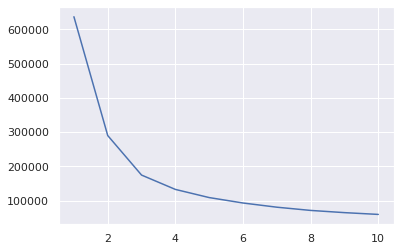

In [10]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(bowler_for_clustering)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7419608324754727
For n_clusters = 3 The average silhouette_score is : 0.5037514667521731
For n_clusters = 4 The average silhouette_score is : 0.35394619812074773
For n_clusters = 5 The average silhouette_score is : 0.33941729877202964
For n_clusters = 6 The average silhouette_score is : 0.2937039827815529
For n_clusters = 7 The average silhouette_score is : 0.29788831964621837
For n_clusters = 8 The average silhouette_score is : 0.2956955350019551
For n_clusters = 9 The average silhouette_score is : 0.28826508170263787
For n_clusters = 10 The average silhouette_score is : 0.2897275314239923


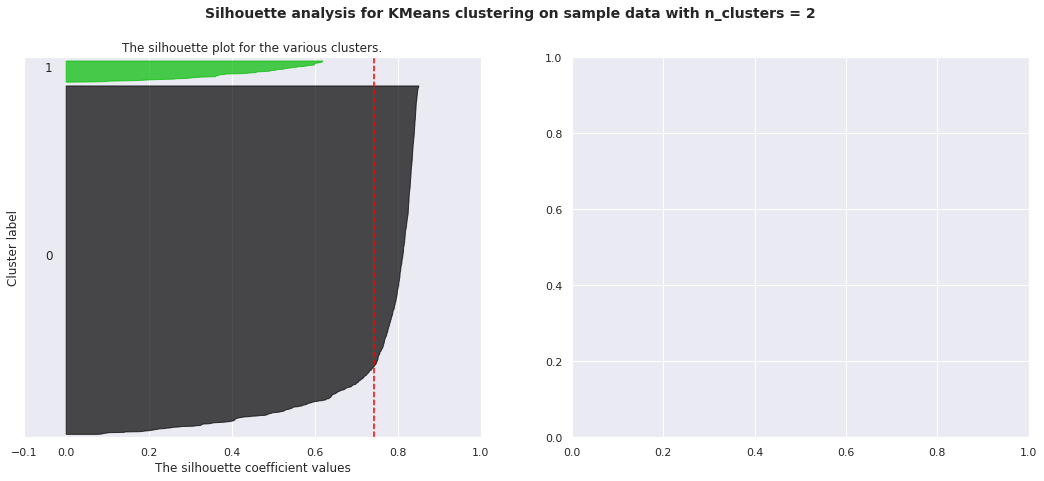

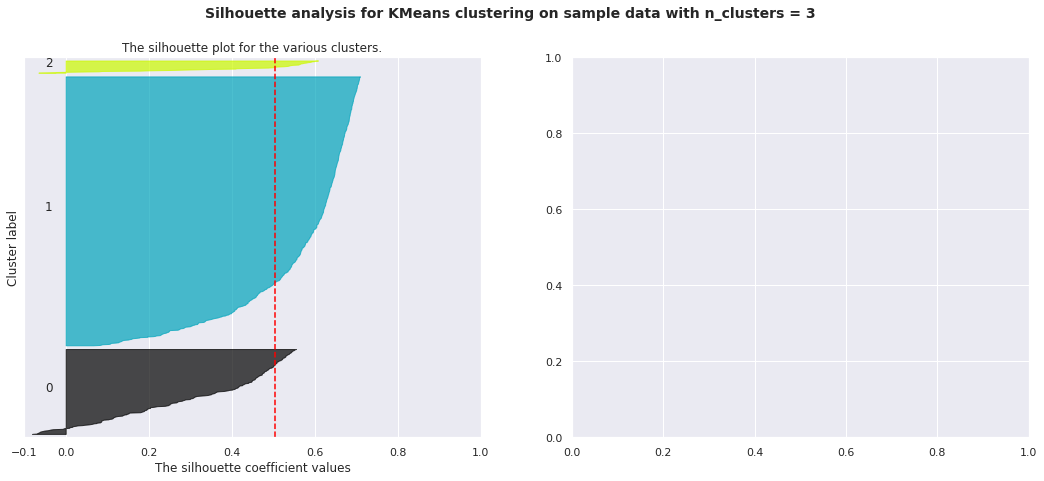

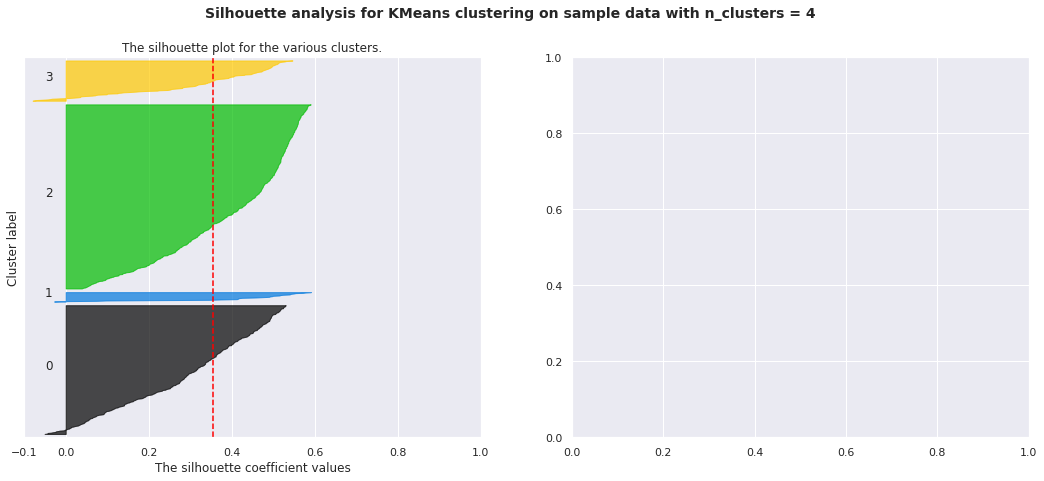

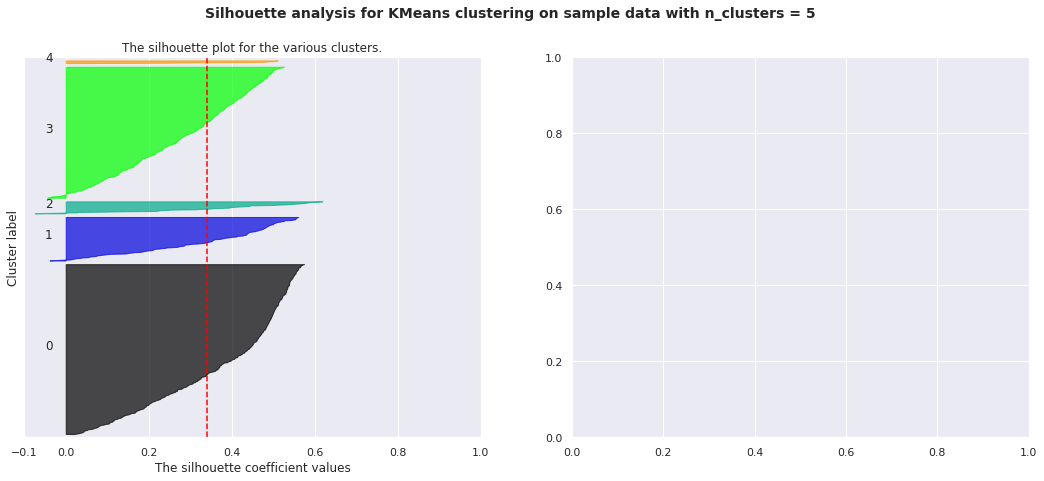

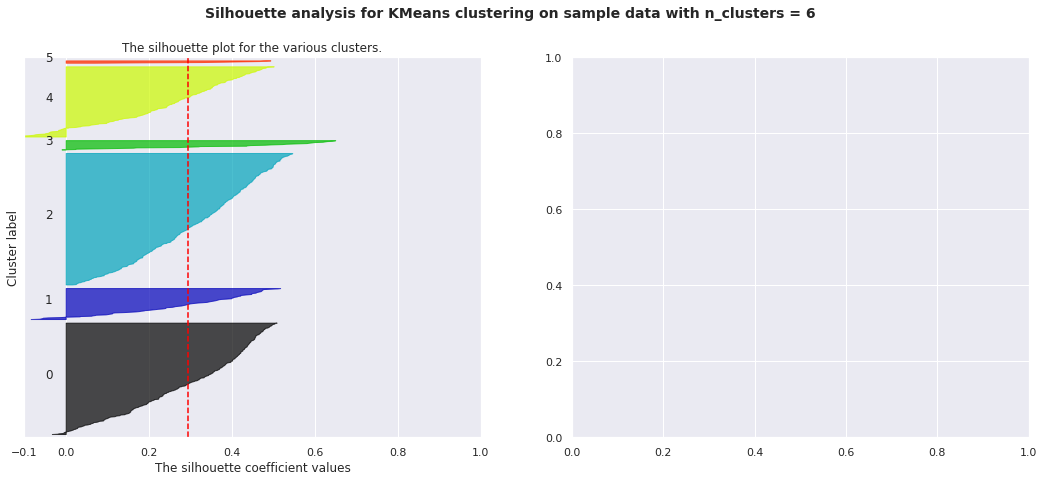

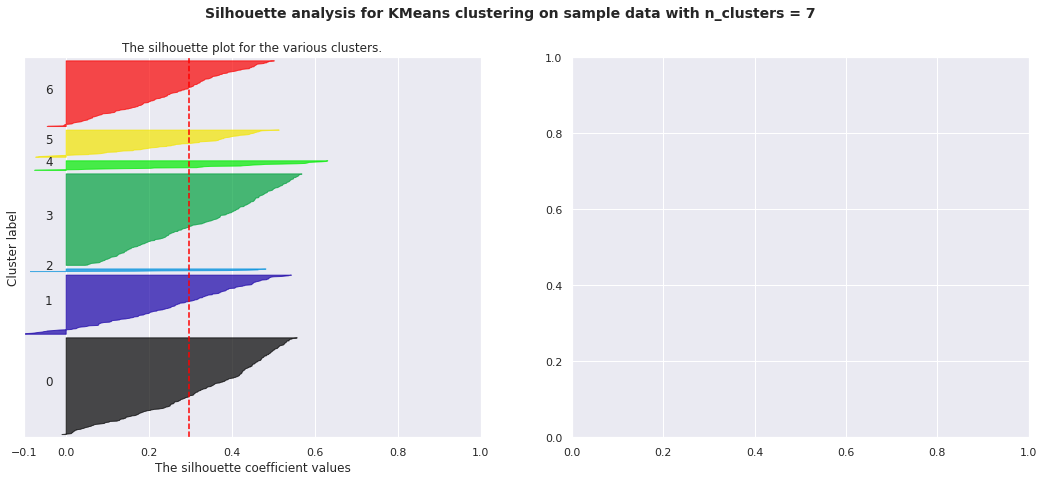

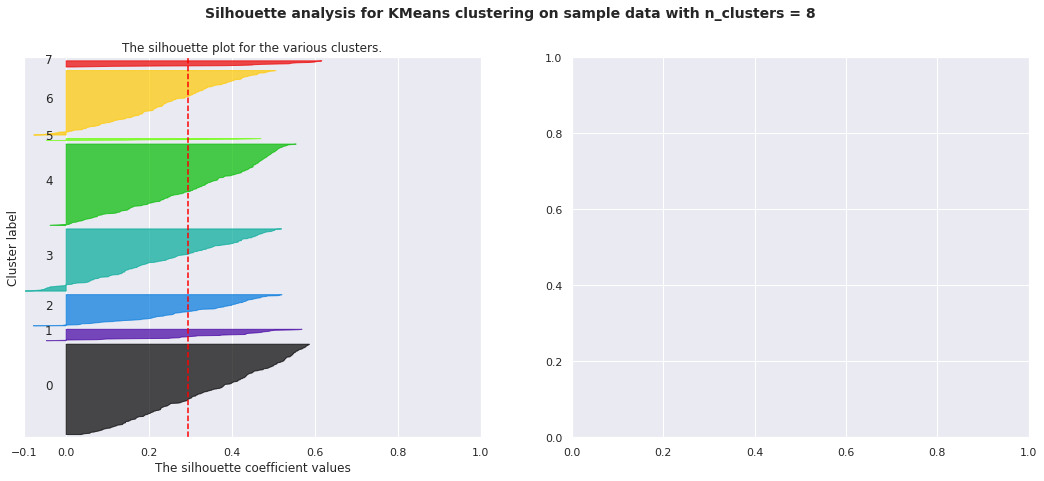

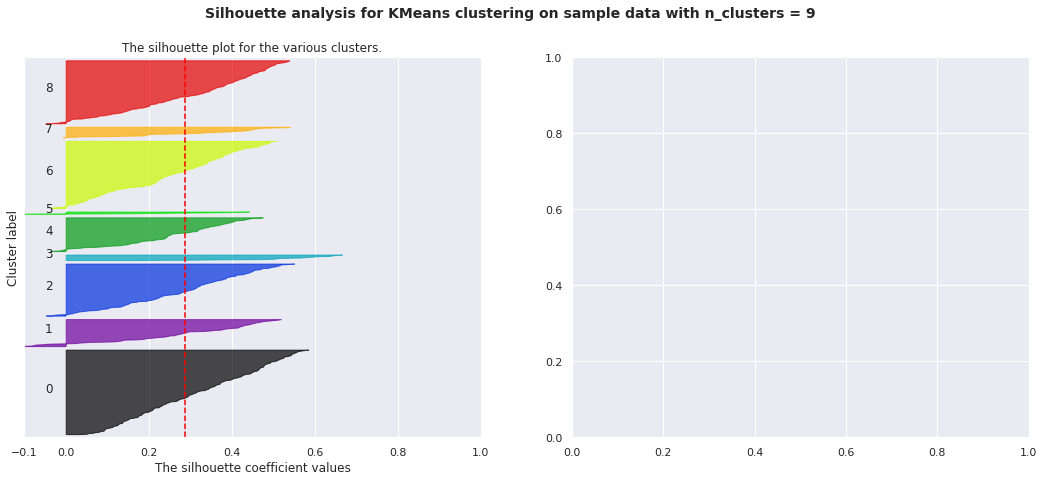

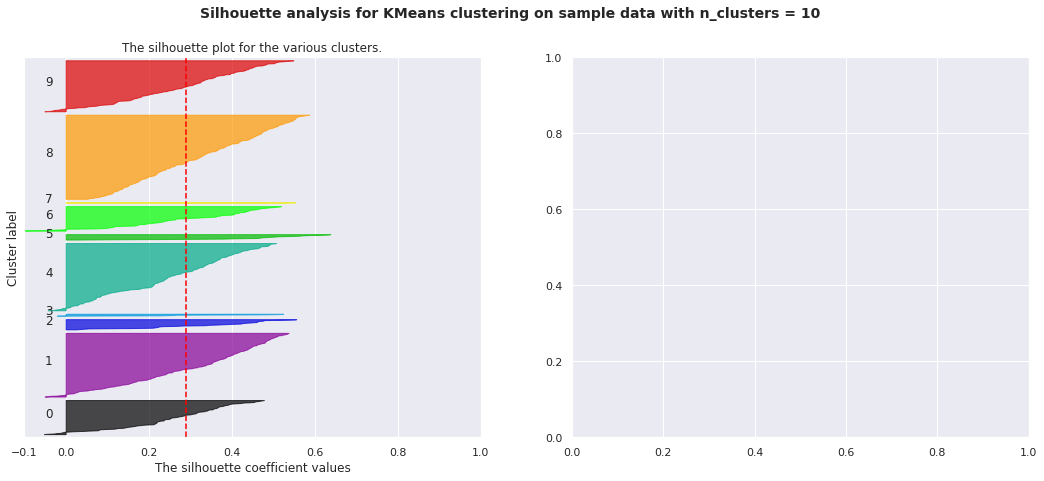

In [11]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(bowler_for_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(bowler_for_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(bowler_for_clustering, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(bowler_for_clustering, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    



    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [12]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(bowler_for_clustering_scaled)

In [13]:
ypred_kmeans

array([1, 3, 1, ..., 2, 0, 2], dtype=int32)

In [14]:
## 1 - good, 0 - Avg , 2 - poor

In [15]:
results = data_scaled
results['kmeans'] = ypred_kmeans

In [16]:
results

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
0,Shakib Al Hasan,BAN,-0.489497,-0.412421,-0.552786,1.158735,0.742461,0.892402,0.474053,0.481080,1
1,TG Southee,NZ,-0.247429,-0.404645,0.528796,1.101343,0.693725,0.032718,0.755866,1.490667,3
2,Rashid Khan,AFG,-0.843844,-0.808989,-0.944148,1.258214,2.043700,1.626278,1.713484,0.171886,1
3,SL Malinga,SL,-0.442629,-0.490180,-0.019111,0.960324,0.830185,0.326268,0.764074,0.835563,1
4,Shahid Afridi,PAK,-0.254639,-0.078059,-0.581249,1.149169,0.150323,0.221429,0.088270,0.443060,3
...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,1.885862,2.324678,0.016468,-1.472261,-1.701628,-0.428576,-1.731204,-1.085392,0
1081,JJ Tucker,BMUDA,1.679846,1.469335,0.998431,-2.087171,-1.701628,-0.428576,-1.731204,-1.271765,0
1082,CL White,AUS,1.113304,1.469335,-0.118730,-2.661088,-1.823467,-0.428576,-1.868007,-2.259547,2
1083,Zahid Khan,SLE,2.349397,2.868988,0.037815,-0.857351,-1.701628,-0.428576,-1.731204,-0.666051,0


In [17]:
results['kmeans'].value_counts()

2    354
1    349
3    320
0     62
Name: kmeans, dtype: int64

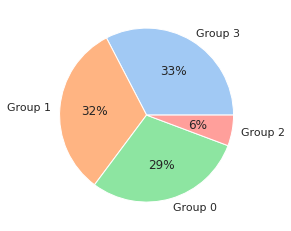

In [18]:
plt.pie(results['kmeans'].value_counts(), colors= sns.color_palette('pastel'), autopct='%.0f%%', labels = ['Group 3','Group 1','Group 0','Group 2'])
plt.show()

In [19]:
columns = bowler_for_clustering_scaled.columns
columns

Index(['average', 'strike_rate', 'economy', 'balls_bolwed_per_innings',
       'wicket_index', 'big_impact_index', 'short_impact_index', 'runs_index'],
      dtype='object')

In [20]:
results = np.round(results,3)

### Defining accuracy Metrics

In [21]:
def get_accuracy_metrics(y_pred,y_test):

  bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
  print ('The balanced accuracy on test data is %s' % (round(bal_acc,5)))

  f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
  print('F1 score micro :',round(f1_micro ,5))

  f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
  print('F1 score macro :',round(f1_macro ,5))

  f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
  print('F1 score weighted :',round(f1_weighted,5))

  recall = metrics.recall_score(y_test, y_pred, average='macro')
  print('Recall score :',recall)

  precision = metrics.precision_score(y_test, y_pred, average='macro')
  print('Precision score :',precision)

  print('\n\n\n\n\n\n\n\n')

  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(confusion_matrix,annot=True, fmt="d",cmap="YlGnBu")


In [22]:
top10countries = ['INDIA','ENG','PAK','SA','NZ','AUS','WI','SL','BAN','AFG']

## Classification

In [23]:
X_train, X_test, y_train, y_test = train_test_split(results.drop('kmeans',axis=1), results['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)
X_test.drop(['name','country'],axis=1,inplace=True)

In [24]:
X_train

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
249,-0.591,-0.319,-1.279,0.498,0.255,0.683,0.017,-0.649
618,-0.219,0.202,-1.129,0.509,-0.415,-0.429,-0.287,-0.516
1067,3.328,4.269,-0.154,0.372,-1.702,-0.429,-1.731,0.219
71,-0.262,-0.280,0.009,1.084,0.448,-0.429,0.682,0.965
94,-0.265,-0.296,0.052,0.609,0.262,0.159,0.165,0.607
...,...,...,...,...,...,...,...,...
330,-0.095,-0.008,-0.190,0.570,-0.162,-0.429,-0.002,0.367
466,-1.081,-0.910,-2.154,1.274,2.563,3.765,1.005,-1.029
121,-0.617,-0.630,-0.346,-0.272,0.474,2.570,-0.820,-0.453
1044,1.731,2.869,-0.816,-0.857,-1.702,-0.429,-1.731,-1.225


In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred_rfc = rfc.predict(X_test)

In [26]:
fi_ovr = np.round(rfc.feature_importances_.tolist(),3)
dict_ovr = dict(zip(columns,np.array(fi_ovr)))
dict_ovr

{'average': 0.224,
 'strike_rate': 0.085,
 'economy': 0.063,
 'balls_bolwed_per_innings': 0.138,
 'wicket_index': 0.157,
 'big_impact_index': 0.009,
 'short_impact_index': 0.103,
 'runs_index': 0.22}

The balanced accuracy on test data is 0.95261
F1 score micro : 0.96626
F1 score macro : 0.96298
F1 score weighted : 0.96617
Recall score : 0.9526066147279588
Precision score : 0.9748070754356333











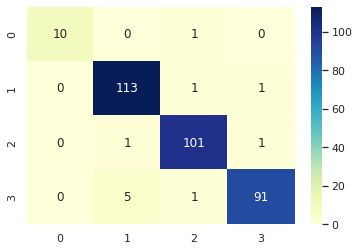

In [27]:
get_accuracy_metrics(ypred_rfc,y_test)

In [28]:
final_index = results.copy()

In [29]:
final_index['rfc_metric'] = 0
for i in columns:
  final_index['rfc_metric'] = np.round(final_index['rfc_metric'] + (final_index[i] * dict_ovr.get(i)),3)   

In [30]:
final_index[final_index.country.isin(top10countries)].sort_values('rfc_metric',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.566
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.353
580,RP Meredith,AUS,-0.303,-0.700,1.803,1.110,1.588,-0.429,1.962,2.847,3,1.212
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.174
952,SI Mahmood,ENG,1.147,0.381,2.578,0.782,-0.483,-0.429,-0.363,3.061,3,1.115
623,M de Lange,SA,0.164,-0.241,1.653,1.384,0.533,-0.429,0.778,2.922,3,1.115
862,KA Jamieson,NZ,2.105,1.547,1.674,0.864,-1.092,-0.429,-1.047,2.386,3,1.069
544,LB Williams,SA,-0.323,-0.576,0.949,1.438,1.344,-0.429,1.689,2.300,3,1.024
491,SHA Rance,NZ,-0.252,-0.537,1.155,1.368,1.171,-0.429,1.495,2.363,3,1.014
645,S Mahmood,ENG,1.415,0.731,2.151,0.708,-0.761,-0.429,-0.675,2.583,3,0.988


#### KNN

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
ypred_knn = knn.predict(X_test)

The balanced accuracy on test data is 0.96618
F1 score micro : 0.95706
F1 score macro : 0.96658
F1 score weighted : 0.95704
Recall score : 0.9661786912569139
Precision score : 0.967436974789916











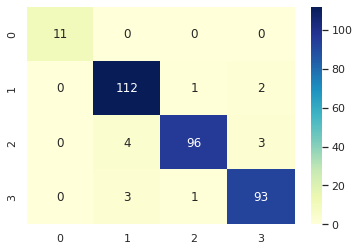

In [32]:
get_accuracy_metrics(ypred_knn,y_test)

#### XGBoost

In [33]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)

The balanced accuracy on test data is 0.95533
F1 score micro : 0.96933
F1 score macro : 0.96559
F1 score weighted : 0.96932
Recall score : 0.955334069437197
Precision score : 0.9771318205775473











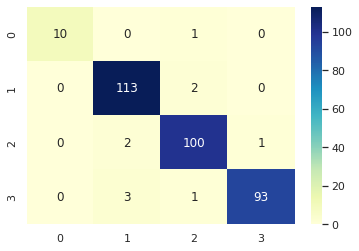

In [34]:
get_accuracy_metrics(ypred_xgb,y_test)

In [35]:
importance = np.round(xgb.feature_importances_,3)
dict_xgb = dict(zip(columns,importance))
dict_xgb

{'average': 0.322,
 'strike_rate': 0.009,
 'economy': 0.035,
 'balls_bolwed_per_innings': 0.22,
 'wicket_index': 0.119,
 'big_impact_index': 0.024,
 'short_impact_index': 0.044,
 'runs_index': 0.226}

In [36]:
final_index['xgb_metric'] = 0
for i in columns:
  final_index['xgb_metric'] = np.round(final_index['xgb_metric'] + (final_index[i] * dict_xgb.get(i)),3)   

In [37]:
final_index[final_index.country.isin(top10countries)].sort_values('xgb_metric',ascending = False).head(10).drop(['rfc_metric'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,xgb_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.731
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.473
862,KA Jamieson,NZ,2.105,1.547,1.674,0.864,-1.092,-0.429,-1.047,2.386,3,1.294
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.290
952,SI Mahmood,ENG,1.147,0.381,2.578,0.782,-0.483,-0.429,-0.363,3.061,3,1.243
997,Avesh Khan,INDIA,2.401,2.636,0.394,1.274,-1.336,-0.429,-1.321,1.505,0,1.204
623,M de Lange,SA,0.164,-0.241,1.653,1.384,0.533,-0.429,0.778,2.922,3,1.160
645,S Mahmood,ENG,1.415,0.731,2.151,0.708,-0.761,-0.429,-0.675,2.583,3,1.147
580,RP Meredith,AUS,-0.303,-0.700,1.803,1.110,1.588,-0.429,1.962,2.847,3,1.111
902,Sohag Gazi,BAN,2.337,2.286,0.778,0.782,-1.336,-0.429,-1.321,1.412,0,1.065


## Voting  Ensembles

In [38]:
xgb = XGBClassifier()
dtree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [39]:
voting = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb), ('decision_tree', dtree)],
    voting='hard')

In [40]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('xg_boost', XGBClassifier()),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42))])

In [41]:
for clf in (rfc,dtree,xgb,voting):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9815950920245399
DecisionTreeClassifier 0.9386503067484663
XGBClassifier 0.9693251533742331
VotingClassifier 0.9815950920245399


In [42]:
ypred_voting = voting.predict(X_test)

The balanced accuracy on test data is 0.96494
F1 score micro : 0.9816
F1 score macro : 0.97483
F1 score weighted : 0.98154
Recall score : 0.9649396710003431
Precision score : 0.9859152190821883











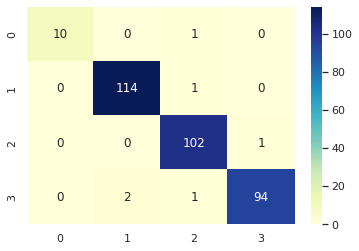

In [43]:
get_accuracy_metrics(ypred_voting,y_test)

In [44]:
def compute_feature_importance(voting, weights):

    feature_importance = dict()
    for est in voting.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    ## print(feature_importance.values())

    fe_scores = [0]*len(list(feature_importance.values())[0])

    ## print(fe_scores)
    for idx, imp_score in enumerate(feature_importance.values()):
        ## print(imp_score)
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [45]:
dict_voting = dict(zip(columns,np.round(compute_feature_importance(voting, [1/3,1/3,1/3]),3)))
dict_voting

{'average': 0.291,
 'strike_rate': 0.038,
 'economy': 0.047,
 'balls_bolwed_per_innings': 0.172,
 'wicket_index': 0.124,
 'big_impact_index': 0.013,
 'short_impact_index': 0.075,
 'runs_index': 0.239}

In [46]:
final_index['voting_metric'] = 0
for i in columns:
  final_index['voting_metric'] = np.round(final_index['voting_metric'] + (final_index[i] * dict_voting.get(i)),3)

In [47]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_metric',ascending = False).head(10).drop(['rfc_metric','xgb_metric'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,voting_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.729
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.467
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.277
862,KA Jamieson,NZ,2.105,1.547,1.674,0.864,-1.092,-0.429,-1.047,2.386,3,1.250
952,SI Mahmood,ENG,1.147,0.381,2.578,0.782,-0.483,-0.429,-0.363,3.061,3,1.243
580,RP Meredith,AUS,-0.303,-0.700,1.803,1.110,1.588,-0.429,1.962,2.847,3,1.179
623,M de Lange,SA,0.164,-0.241,1.653,1.384,0.533,-0.429,0.778,2.922,3,1.171
645,S Mahmood,ENG,1.415,0.731,2.151,0.708,-0.761,-0.429,-0.675,2.583,3,1.129
997,Avesh Khan,INDIA,2.401,2.636,0.394,1.274,-1.336,-0.429,-1.321,1.505,0,1.126
928,DC Drakes,WI,1.525,0.692,2.571,0.290,-0.849,-0.429,-0.774,2.437,3,1.054


In [48]:
middle_ovr = pd.DataFrame()

### One against all

#### 0

In [49]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:0,0:1})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [50]:
rfc_0 = RandomForestClassifier()
rfc_0.fit(X_train, y_train)
ypred_rfc_0 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_0 = np.round(rfc_0.feature_importances_,3)
dict_0 = dict(zip(columns,fi_0))
dict_0

{'average': 0.312,
 'strike_rate': 0.265,
 'economy': 0.02,
 'balls_bolwed_per_innings': 0.026,
 'wicket_index': 0.17,
 'big_impact_index': 0.001,
 'short_impact_index': 0.174,
 'runs_index': 0.031}

In [51]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
674,DV Varghese,BUL,1.598,0.770,2.514,-1.468,-1.363,-0.429,-1.351,0.219,1
872,Mehidy Hasan Miraz,BAN,2.736,2.402,1.219,-0.416,-1.560,-0.429,-1.573,0.571,1
873,Mohameed Taiwo,NGA,2.118,2.402,0.273,0.410,-1.424,-0.429,-1.419,0.617,1
902,Sohag Gazi,BAN,2.337,2.286,0.778,0.782,-1.336,-0.429,-1.321,1.412,1
912,BV Vitori,ZIM,2.646,2.830,0.493,0.917,-1.424,-0.429,-1.419,1.312,1
...,...,...,...,...,...,...,...,...,...,...,...
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,1
1079,S Tarawally,SLE,4.564,7.068,-0.880,0.236,-1.904,-0.429,-1.958,-0.495,1
1080,S Thanikaithasan,DEN,1.886,2.325,0.016,-1.472,-1.702,-0.429,-1.731,-1.085,1
1081,JJ Tucker,BMUDA,1.680,1.469,0.998,-2.087,-1.702,-0.429,-1.731,-1.272,1


In [52]:
results_new['ovr_metric'] = 0
for i in columns:
  results_new['ovr_metric'] = np.round(results_new['ovr_metric'] + (results_new[i] * dict_0.get(i)),3)

In [53]:
results_new[results_new.kmeans == 1].sort_values('ovr_metric',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,ovr_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,3.937
1059,Jaison Jerome,MLT,8.272,7.068,1.817,0.236,-1.904,-0.429,-1.958,1.741,3.885
1053,RJ Hatchman,GIBR,6.933,4.735,3.034,-1.677,-1.962,-0.429,-2.024,0.206,2.755
1079,S Tarawally,SLE,4.564,7.068,-0.880,0.236,-1.904,-0.429,-1.958,-0.495,2.605
1040,JB Abega,CAM,5.749,4.657,1.952,0.577,-1.702,-0.429,-1.731,2.409,2.567
1050,A Djorovic,SRB,5.491,5.435,0.942,-0.775,-1.904,-0.429,-1.958,0.064,2.489
1046,Basil George,MLT,5.955,4.968,1.817,-1.607,-1.962,-0.429,-2.024,-0.300,2.474
1071,M Podosky,PHI,4.667,5.668,0.038,1.602,-1.702,-0.429,-1.731,1.431,2.455
1041,N Ahir,PNM,4.822,4.269,1.432,-0.693,-1.823,-0.429,-1.868,0.424,2.024
1061,S Kushretha,LUX,3.740,4.735,-0.119,0.782,-1.702,-0.429,-1.731,0.592,1.868


In [54]:
middle_ovr = results_new[results_new.kmeans == 1].copy()

#### 1

In [55]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:1,2:0,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [56]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train, y_train)
ypred_rfc_1 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_1 = np.round(rfc_1.feature_importances_,3)
dict_1 = dict(zip(columns,fi_1))
dict_1

{'average': 0.258,
 'strike_rate': 0.103,
 'economy': 0.093,
 'balls_bolwed_per_innings': 0.097,
 'wicket_index': 0.224,
 'big_impact_index': 0.032,
 'short_impact_index': 0.121,
 'runs_index': 0.071}

In [57]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
0,Shakib Al Hasan,BAN,-0.489,-0.412,-0.553,1.159,0.742,0.892,0.474,0.481,1
2,Rashid Khan,AFG,-0.844,-0.809,-0.944,1.258,2.044,1.626,1.713,0.172,1
3,SL Malinga,SL,-0.443,-0.490,-0.019,0.960,0.830,0.326,0.764,0.836,1
5,Mustafizur Rahman,BAN,-0.501,-0.591,0.088,0.910,1.054,0.892,0.830,0.898,1
6,Saeed Ajmal,PAK,-0.595,-0.490,-0.773,1.243,0.976,0.892,0.783,0.324,1
...,...,...,...,...,...,...,...,...,...,...,...
875,Mohammad Kamran,ESP,-0.561,-0.047,-1.791,1.192,0.126,-0.429,0.321,-0.713,1
909,Usman Khan,Fran,-0.445,-0.280,-0.759,0.372,0.126,-0.429,0.321,-0.293,1
910,TCW Veillard,GUE,-0.316,0.070,-1.165,1.602,0.126,-0.429,0.321,0.173,1
914,Yasir Mehmood,CYP,-0.445,-0.397,-0.382,-0.037,0.126,-0.429,0.321,-0.293,1


In [58]:
results_new['ovr_metric'] = 0
for i in columns:
  results_new['ovr_metric'] = np.round(results_new['ovr_metric'] + (results_new[i] * dict_1.get(i)),3)

In [59]:
results_new[results_new.kmeans == 1].sort_values('ovr_metric',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,ovr_metric
542,I Wardlaw,SCOT,-0.684,-0.972,1.148,1.602,3.172,-0.429,3.741,2.595,1.320
425,Sajid Liaqat,GER,-0.668,-0.879,0.621,1.438,2.563,-0.429,3.057,1.959,1.003
636,Imran Ali,KUW,-0.513,-0.801,1.148,1.192,1.954,-0.429,2.373,2.176,0.873
209,D Maisuria,BOT,-1.111,-1.097,-1.592,1.056,3.645,4.226,3.057,-0.599,0.832
374,Ashwin Vinod,SUI,-0.951,-0.972,-0.909,1.329,2.970,-0.429,3.514,0.250,0.793
497,Waqar Ali,CYP,-1.168,-1.104,-2.090,0.987,3.781,4.813,3.057,-1.039,0.784
653,T Natarajan,INDIA,-0.616,-0.731,0.123,1.602,1.954,-0.429,2.373,1.524,0.751
538,Sirajullah Khadim,PORT,-1.079,-0.972,-1.919,1.602,3.172,-0.429,3.741,-0.619,0.705
219,Hamza Tahir,SCOT,-0.505,-0.669,0.429,1.476,1.625,1.186,1.462,1.732,0.686
515,TE Kane,IRE,-0.696,-1.003,1.333,0.028,2.075,-0.429,2.510,1.170,0.682


In [60]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

#### 2

In [61]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:1,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [62]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train, y_train)
ypred_rfc_2 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_2 = np.round(rfc_2.feature_importances_,3)
dict_2 = dict(zip(columns,fi_2))
dict_2

{'average': 0.108,
 'strike_rate': 0.072,
 'economy': 0.053,
 'balls_bolwed_per_innings': 0.256,
 'wicket_index': 0.151,
 'big_impact_index': 0.012,
 'short_impact_index': 0.109,
 'runs_index': 0.239}

In [63]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
28,Mohammad Hafeez,PAK,-0.342,-0.195,-0.603,-0.596,-0.430,-0.156,-0.415,-0.886,1
36,PM Seelaar,NED,-0.368,-0.280,-0.439,-0.130,-0.103,-0.093,-0.070,-0.404,1
69,DJG Sammy,WI,-0.207,-0.179,-0.097,-0.721,-0.493,0.284,-0.735,-0.635,1
77,KA Pollard,WI,-0.057,-0.218,0.621,-1.250,-0.685,-0.093,-0.738,-0.646,1
96,Mahmudullah,BAN,-0.126,-0.055,-0.183,-1.622,-0.985,-0.429,-0.927,-1.428,1
...,...,...,...,...,...,...,...,...,...,...,...
1045,CD Barnwell,WI,1.113,1.003,0.749,-2.497,-1.702,-0.429,-1.731,-1.784,1
1052,NA Greenwood,JER,0.083,0.070,0.216,-3.317,-1.702,-0.429,-1.731,-2.716,1
1063,SKDT Madusanka,SEY,1.474,1.003,1.575,-2.497,-1.702,-0.429,-1.731,-1.458,1
1082,CL White,AUS,1.113,1.469,-0.119,-2.661,-1.823,-0.429,-1.868,-2.260,1


In [64]:
results_new['ovr_metric'] = 0
for i in columns:
  results_new['ovr_metric'] = np.round(results_new['ovr_metric'] + (results_new[i] * dict_2.get(i)),3)

In [65]:
results_new[results_new.kmeans == 1].sort_values('ovr_metric',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,ovr_metric
753,Khalid Zahid,SWE,0.876,1.267,-0.275,0.372,-1.092,-0.429,-1.047,0.163,0.021
100,Ahmed Raza,UAE,0.132,0.466,-0.624,0.562,-0.625,-0.030,-0.752,-0.039,-0.026
857,O Gholami,SWE,-0.161,0.186,-0.909,0.618,-0.361,-0.429,-0.226,-0.247,-0.038
498,S Wickramasekara,CZK-R,0.578,0.886,-0.275,0.263,-0.956,-0.429,-0.894,0.043,-0.058
802,PJ Ongondo,KENYA,0.310,0.630,-0.460,0.372,-0.788,-0.429,-0.705,-0.037,-0.061
789,MW Machan,SCOT,0.094,0.303,-0.368,0.267,-0.571,-0.429,-0.462,-0.007,-0.063
924,P Buccimazza,PORT,-0.037,0.225,-0.595,0.372,-0.483,-0.429,-0.363,-0.154,-0.080
584,Nazmul Islam,BAN,0.192,0.443,-0.403,0.277,-0.685,-0.429,-0.590,-0.045,-0.080
846,PP Chawla,INDIA,0.431,0.886,-0.631,0.431,-0.919,-0.429,-0.853,-0.140,-0.082
332,Kaleemullah,OMA,-0.188,-0.024,-0.496,0.245,-0.281,-0.429,-0.136,-0.164,-0.086


In [66]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

#### 3

In [67]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:1,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [68]:
rfc_3 = RandomForestClassifier()
rfc_3.fit(X_train, y_train)
ypred_rfc_3 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_3 = np.round(rfc_3.feature_importances_,3)
dict_3 = dict(zip(columns,fi_3))
dict_3

{'average': 0.216,
 'strike_rate': 0.074,
 'economy': 0.114,
 'balls_bolwed_per_innings': 0.114,
 'wicket_index': 0.087,
 'big_impact_index': 0.011,
 'short_impact_index': 0.077,
 'runs_index': 0.308}

In [69]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
1,TG Southee,NZ,-0.247,-0.405,0.529,1.101,0.694,0.033,0.756,1.491,1
4,Shahid Afridi,PAK,-0.255,-0.078,-0.581,1.149,0.150,0.221,0.088,0.443,1
7,IS Sodhi,NZ,-0.382,-0.529,0.429,0.841,0.850,0.221,0.895,1.151,1
9,CJ Jordan,ENG,-0.065,-0.288,0.856,0.794,0.323,0.138,0.321,1.506,1
10,DJ Bravo,WI,-0.169,-0.304,0.472,0.378,0.158,0.389,0.025,0.768,1
...,...,...,...,...,...,...,...,...,...,...,...
1003,AM Ellis,NZ,1.191,0.536,2.173,-0.857,-1.092,-0.429,-1.047,0.732,1
1004,Festus Benn,Bhm,1.268,0.303,3.240,-1.267,-1.092,-0.429,-1.047,0.872,1
1009,Imran Ashraf,QAT,1.397,0.770,2.009,-0.447,-1.092,-0.429,-1.047,1.105,1
1012,B Khumalo,BOT,1.294,1.197,0.742,0.167,-1.092,-0.429,-1.047,0.918,1


In [70]:
results_new['ovr_metric'] = 0
for i in columns:
  results_new['ovr_metric'] = np.round(results_new['ovr_metric'] + (results_new[i] * dict_3.get(i)),3)

In [71]:
results_new[results_new.kmeans == 1].sort_values('ovr_metric',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,ovr_metric
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,1.719
952,SI Mahmood,ENG,1.147,0.381,2.578,0.782,-0.483,-0.429,-0.363,3.061,1.527
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,1.470
862,KA Jamieson,NZ,2.105,1.547,1.674,0.864,-1.092,-0.429,-1.047,2.386,1.412
580,RP Meredith,AUS,-0.303,-0.700,1.803,1.110,1.588,-0.429,1.962,2.847,1.377
623,M de Lange,SA,0.164,-0.241,1.653,1.384,0.533,-0.429,0.778,2.922,1.364
645,S Mahmood,ENG,1.415,0.731,2.151,0.708,-0.761,-0.429,-0.675,2.583,1.359
928,DC Drakes,WI,1.525,0.692,2.571,0.290,-0.849,-0.429,-0.774,2.437,1.318
638,Jasdeep Singh,USA,-0.483,-0.863,1.817,0.782,1.954,-0.429,2.373,2.363,1.204
717,Muhammad Ansar,KUW,-0.286,-0.723,2.052,0.577,1.344,-0.429,1.689,2.502,1.197


In [72]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

In [73]:
middle_ovr

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,ovr_metric
674,DV Varghese,BUL,1.598,0.770,2.514,-1.468,-1.363,-0.429,-1.351,0.219,1,0.255
872,Mehidy Hasan Miraz,BAN,2.736,2.402,1.219,-0.416,-1.560,-0.429,-1.573,0.571,1,0.983
873,Mohameed Taiwo,NGA,2.118,2.402,0.273,0.410,-1.424,-0.429,-1.419,0.617,1,0.844
902,Sohag Gazi,BAN,2.337,2.286,0.778,0.782,-1.336,-0.429,-1.321,1.412,1,0.958
912,BV Vitori,ZIM,2.646,2.830,0.493,0.917,-1.424,-0.429,-1.419,1.312,1,1.162
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,AM Ellis,NZ,1.191,0.536,2.173,-0.857,-1.092,-0.429,-1.047,0.732,1,0.491
1004,Festus Benn,Bhm,1.268,0.303,3.240,-1.267,-1.092,-0.429,-1.047,0.872,1,0.609
1009,Imran Ashraf,QAT,1.397,0.770,2.009,-0.447,-1.092,-0.429,-1.047,1.105,1,0.696
1012,B Khumalo,BOT,1.294,1.197,0.742,0.167,-1.092,-0.429,-1.047,0.918,1,0.575


In [74]:
final_index = pd.merge(final_index,middle_ovr[['name','country','ovr_metric']],on=['name','country'],how='left')

In [75]:
final_index[final_index.country.isin(top10countries)].sort_values('ovr_metric',ascending = False).head(10).drop(['rfc_metric','xgb_metric','voting_metric'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,ovr_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,3.937
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.719
952,SI Mahmood,ENG,1.147,0.381,2.578,0.782,-0.483,-0.429,-0.363,3.061,3,1.527
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.470
1077,RG Sharma,INDIA,4.307,3.491,1.795,-2.916,-2.040,-0.429,-2.112,-1.820,0,1.459
862,KA Jamieson,NZ,2.105,1.547,1.674,0.864,-1.092,-0.429,-1.047,2.386,3,1.412
1055,Iftikhar Ahmed,PAK,3.585,3.958,0.408,-2.099,-1.962,-0.429,-2.024,-1.525,0,1.388
580,RP Meredith,AUS,-0.303,-0.700,1.803,1.110,1.588,-0.429,1.962,2.847,3,1.377
623,M de Lange,SA,0.164,-0.241,1.653,1.384,0.533,-0.429,0.778,2.922,3,1.364
645,S Mahmood,ENG,1.415,0.731,2.151,0.708,-0.761,-0.429,-0.675,2.583,3,1.359


In [76]:
final_index

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
0,Shakib Al Hasan,BAN,-0.489,-0.412,-0.553,1.159,0.742,0.892,0.474,0.481,1,0.259,0.314,0.270,0.179
1,TG Southee,NZ,-0.247,-0.405,0.529,1.101,0.694,0.033,0.756,1.491,3,0.611,0.631,0.626,0.680
2,Rashid Khan,AFG,-0.844,-0.809,-0.944,1.258,2.044,1.626,1.713,0.172,1,0.407,0.361,0.338,0.462
3,SL Malinga,SL,-0.443,-0.490,-0.019,0.960,0.830,0.326,0.764,0.836,1,0.386,0.393,0.380,0.274
4,Shahid Afridi,PAK,-0.255,-0.078,-0.581,1.149,0.150,0.221,0.088,0.443,3,0.190,0.277,0.229,0.162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,1.886,2.325,0.016,-1.472,-1.702,-0.429,-1.731,-1.085,0,-0.270,-0.229,-0.221,0.542
1081,JJ Tucker,BMUDA,1.680,1.469,0.998,-2.087,-1.702,-0.429,-1.731,-1.272,0,-0.453,-0.446,-0.418,0.250
1082,CL White,AUS,1.113,1.469,-0.119,-2.661,-1.823,-0.429,-1.868,-2.260,2,-0.979,-1.038,-0.996,-1.485
1083,Zahid Khan,SLE,2.349,2.869,0.038,-0.857,-1.702,-0.429,-1.731,-0.666,0,0.058,0.154,0.142,0.861


In [77]:
final_index[final_index.country.isin(top10countries)].sort_values('ovr_metric',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.566,1.731,1.729,3.937
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.353,1.473,1.467,1.719
952,SI Mahmood,ENG,1.147,0.381,2.578,0.782,-0.483,-0.429,-0.363,3.061,3,1.115,1.243,1.243,1.527
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.174,1.290,1.277,1.470
1077,RG Sharma,INDIA,4.307,3.491,1.795,-2.916,-2.040,-0.429,-2.112,-1.820,0,0.031,0.082,0.116,1.459
862,KA Jamieson,NZ,2.105,1.547,1.674,0.864,-1.092,-0.429,-1.047,2.386,3,1.069,1.294,1.250,1.412
1055,Iftikhar Ahmed,PAK,3.585,3.958,0.408,-2.099,-1.962,-0.429,-2.024,-1.525,0,0.020,0.065,0.086,1.388
580,RP Meredith,AUS,-0.303,-0.700,1.803,1.110,1.588,-0.429,1.962,2.847,3,1.212,1.111,1.179,1.377
623,M de Lange,SA,0.164,-0.241,1.653,1.384,0.533,-0.429,0.778,2.922,3,1.115,1.160,1.171,1.364
645,S Mahmood,ENG,1.415,0.731,2.151,0.708,-0.761,-0.429,-0.675,2.583,3,0.988,1.147,1.129,1.359


In [78]:
final_index.sort_values('rfc_metric',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
1059,Jaison Jerome,MLT,8.272,7.068,1.817,0.236,-1.904,-0.429,-1.958,1.741,0,2.479,2.914,2.829,3.885
1040,JB Abega,CAM,5.749,4.657,1.952,0.577,-1.702,-0.429,-1.731,2.409,0,1.968,2.343,2.270,2.567
1071,M Podosky,PHI,4.667,5.668,0.038,1.602,-1.702,-0.429,-1.731,1.431,0,1.616,1.941,1.846,2.455
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.566,1.731,1.729,3.937
542,I Wardlaw,SCOT,-0.684,-0.972,1.148,1.602,3.172,-0.429,3.741,2.595,1,1.507,1.281,1.382,1.320
1053,RJ Hatchman,GIBR,6.933,4.735,3.034,-1.677,-1.962,-0.429,-2.024,0.206,0,1.440,1.727,1.701,2.755
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.353,1.473,1.467,1.719
580,RP Meredith,AUS,-0.303,-0.700,1.803,1.110,1.588,-0.429,1.962,2.847,3,1.212,1.111,1.179,1.377
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.174,1.290,1.277,1.470
425,Sajid Liaqat,GER,-0.668,-0.879,0.621,1.438,2.563,-0.429,3.057,1.959,1,1.156,0.988,1.058,1.003


In [79]:
final_index.sort_values('xgb_metric',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
1059,Jaison Jerome,MLT,8.272,7.068,1.817,0.236,-1.904,-0.429,-1.958,1.741,0,2.479,2.914,2.829,3.885
1040,JB Abega,CAM,5.749,4.657,1.952,0.577,-1.702,-0.429,-1.731,2.409,0,1.968,2.343,2.270,2.567
1071,M Podosky,PHI,4.667,5.668,0.038,1.602,-1.702,-0.429,-1.731,1.431,0,1.616,1.941,1.846,2.455
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.566,1.731,1.729,3.937
1053,RJ Hatchman,GIBR,6.933,4.735,3.034,-1.677,-1.962,-0.429,-2.024,0.206,0,1.440,1.727,1.701,2.755
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.353,1.473,1.467,1.719
1050,A Djorovic,SRB,5.491,5.435,0.942,-0.775,-1.904,-0.429,-1.958,0.064,0,1.153,1.371,1.342,2.489
862,KA Jamieson,NZ,2.105,1.547,1.674,0.864,-1.092,-0.429,-1.047,2.386,3,1.069,1.294,1.250,1.412
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.174,1.290,1.277,1.470
542,I Wardlaw,SCOT,-0.684,-0.972,1.148,1.602,3.172,-0.429,3.741,2.595,1,1.507,1.281,1.382,1.320


In [80]:
final_index.sort_values('ovr_metric',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.566,1.731,1.729,3.937
1059,Jaison Jerome,MLT,8.272,7.068,1.817,0.236,-1.904,-0.429,-1.958,1.741,0,2.479,2.914,2.829,3.885
1053,RJ Hatchman,GIBR,6.933,4.735,3.034,-1.677,-1.962,-0.429,-2.024,0.206,0,1.440,1.727,1.701,2.755
1079,S Tarawally,SLE,4.564,7.068,-0.880,0.236,-1.904,-0.429,-1.958,-0.495,0,0.987,1.120,1.090,2.605
1040,JB Abega,CAM,5.749,4.657,1.952,0.577,-1.702,-0.429,-1.731,2.409,0,1.968,2.343,2.270,2.567
1050,A Djorovic,SRB,5.491,5.435,0.942,-0.775,-1.904,-0.429,-1.958,0.064,0,1.153,1.371,1.342,2.489
1046,Basil George,MLT,5.955,4.968,1.817,-1.607,-1.962,-0.429,-2.024,-0.300,0,1.062,1.273,1.258,2.474
1071,M Podosky,PHI,4.667,5.668,0.038,1.602,-1.702,-0.429,-1.731,1.431,0,1.616,1.941,1.846,2.455
1041,N Ahir,PNM,4.822,4.269,1.432,-0.693,-1.823,-0.429,-1.868,0.424,0,1.048,1.276,1.242,2.024
1061,S Kushretha,LUX,3.740,4.735,-0.119,0.782,-1.702,-0.429,-1.731,0.592,0,1.022,1.260,1.191,1.868


In [81]:
final_index.sort_values('voting_metric',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
1059,Jaison Jerome,MLT,8.272,7.068,1.817,0.236,-1.904,-0.429,-1.958,1.741,0,2.479,2.914,2.829,3.885
1040,JB Abega,CAM,5.749,4.657,1.952,0.577,-1.702,-0.429,-1.731,2.409,0,1.968,2.343,2.270,2.567
1071,M Podosky,PHI,4.667,5.668,0.038,1.602,-1.702,-0.429,-1.731,1.431,0,1.616,1.941,1.846,2.455
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.566,1.731,1.729,3.937
1053,RJ Hatchman,GIBR,6.933,4.735,3.034,-1.677,-1.962,-0.429,-2.024,0.206,0,1.440,1.727,1.701,2.755
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.353,1.473,1.467,1.719
542,I Wardlaw,SCOT,-0.684,-0.972,1.148,1.602,3.172,-0.429,3.741,2.595,1,1.507,1.281,1.382,1.320
1050,A Djorovic,SRB,5.491,5.435,0.942,-0.775,-1.904,-0.429,-1.958,0.064,0,1.153,1.371,1.342,2.489
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.174,1.290,1.277,1.470
1046,Basil George,MLT,5.955,4.968,1.817,-1.607,-1.962,-0.429,-2.024,-0.300,0,1.062,1.273,1.258,2.474


In [82]:
final_index[final_index.country == 'INDIA'].sort_values('rfc_metric',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.353,1.473,1.467,1.719
997,Avesh Khan,INDIA,2.401,2.636,0.394,1.274,-1.336,-0.429,-1.321,1.505,0,0.944,1.204,1.126,1.079
653,T Natarajan,INDIA,-0.616,-0.731,0.123,1.602,1.954,-0.429,2.373,1.524,1,0.911,0.822,0.853,0.751
863,Joginder Sharma,INDIA,0.263,-0.109,1.468,0.905,0.126,-0.429,0.321,2.269,3,0.815,0.866,0.874,1.049
271,Mohammed Shami,INDIA,0.112,-0.257,1.489,0.763,0.270,-0.429,0.482,2.067,3,0.745,0.764,0.781,0.954
119,SN Thakur,INDIA,-0.309,-0.607,1.212,0.796,1.040,0.452,1.035,1.835,3,0.743,0.709,0.733,0.857
373,KK Ahmed,INDIA,0.305,0.070,0.977,1.134,-0.047,-0.429,0.127,1.950,3,0.723,0.813,0.797,0.913
668,S Sreesanth,INDIA,0.605,0.466,0.728,1.238,-0.415,-0.429,-0.287,1.803,3,0.691,0.831,0.793,0.881
545,UT Yadav,INDIA,-0.260,-0.506,0.934,0.900,0.823,-0.429,1.103,1.670,3,0.688,0.656,0.682,0.782
295,HV Patel,INDIA,-0.508,-0.723,0.728,0.872,1.454,1.480,1.142,1.465,1,0.672,0.636,0.644,0.563


In [83]:
final_index[final_index.country == 'INDIA'].sort_values('voting_metric',ascending = False).tail(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
1077,RG Sharma,INDIA,4.307,3.491,1.795,-2.916,-2.040,-0.429,-2.112,-1.820,0,0.031,0.082,0.116,1.459
53,RA Jadeja,INDIA,-0.100,0.015,-0.290,0.522,-0.223,-0.429,-0.070,0.226,3,0.037,0.084,0.063,0.047
76,HH Pandya,INDIA,-0.042,-0.202,0.636,-0.155,-0.223,-0.009,-0.248,0.404,3,0.021,0.025,0.033,0.117
846,PP Chawla,INDIA,0.431,0.886,-0.631,0.431,-0.919,-0.429,-0.853,-0.140,2,-0.076,0.031,-0.014,-0.082
737,MM Sharma,INDIA,0.074,-0.008,0.422,-0.242,-0.483,-0.429,-0.363,0.149,3,-0.074,-0.063,-0.057,0.006
575,P Kumar,INDIA,-0.271,-0.280,-0.019,-0.693,-0.361,-0.429,-0.226,-0.564,2,-0.390,-0.433,-0.413,-0.447
785,VR Iyer,INDIA,-0.741,-0.941,0.522,-1.226,0.735,-0.429,1.005,-0.666,1,-0.314,-0.529,-0.437,-0.132
867,V Kohli,INDIA,1.036,1.042,0.486,-1.650,-1.499,-0.429,-1.504,-1.085,2,-0.509,-0.502,-0.484,-0.863
394,SK Raina,INDIA,0.238,0.287,0.102,-1.428,-1.139,-0.429,-1.099,-1.110,2,-0.654,-0.675,-0.655,-0.876
147,Yuvraj Singh,INDIA,-0.596,-0.622,-0.275,-1.233,-0.110,-0.429,0.055,-1.161,2,-0.644,-0.762,-0.715,-0.733


In [84]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_metric',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,1.566,1.731,1.729,3.937
794,Mohammed Siraj,INDIA,0.639,0.070,2.137,1.602,0.126,-0.429,0.321,3.630,3,1.353,1.473,1.467,1.719
853,RR Emrit,WI,0.495,0.070,1.639,1.602,0.126,-0.429,0.321,3.108,3,1.174,1.290,1.277,1.470
862,KA Jamieson,NZ,2.105,1.547,1.674,0.864,-1.092,-0.429,-1.047,2.386,3,1.069,1.294,1.250,1.412
952,SI Mahmood,ENG,1.147,0.381,2.578,0.782,-0.483,-0.429,-0.363,3.061,3,1.115,1.243,1.243,1.527
580,RP Meredith,AUS,-0.303,-0.700,1.803,1.110,1.588,-0.429,1.962,2.847,3,1.212,1.111,1.179,1.377
623,M de Lange,SA,0.164,-0.241,1.653,1.384,0.533,-0.429,0.778,2.922,3,1.115,1.160,1.171,1.364
645,S Mahmood,ENG,1.415,0.731,2.151,0.708,-0.761,-0.429,-0.675,2.583,3,0.988,1.147,1.129,1.359
997,Avesh Khan,INDIA,2.401,2.636,0.394,1.274,-1.336,-0.429,-1.321,1.505,0,0.944,1.204,1.126,1.079
928,DC Drakes,WI,1.525,0.692,2.571,0.290,-0.849,-0.429,-0.774,2.437,3,0.922,1.057,1.054,1.318


In [85]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_metric',ascending = False).tail(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric
145,Shoaib Malik,PAK,-0.272,-0.218,-0.247,-1.778,-0.919,-0.429,-0.853,-1.593,2,-0.927,-1.007,-0.970,-1.131
740,LMP Simmons,WI,-0.895,-1.244,1.845,-2.628,0.613,3.765,-1.047,-1.477,2,-0.856,-1.029,-0.979,-1.091
1082,CL White,AUS,1.113,1.469,-0.119,-2.661,-1.823,-0.429,-1.868,-2.260,2,-0.979,-1.038,-0.996,-1.485
750,KS Williamson,NZ,-0.106,-0.272,0.628,-2.306,-1.092,-0.429,-1.047,-1.613,2,-0.963,-1.072,-1.014,-1.258
800,RJ Nicol,NZ,0.207,0.116,0.493,-2.396,-1.373,-0.429,-1.362,-1.766,2,-0.993,-1.074,-1.025,-1.339
878,Nawroz Mangal,AFG,-0.483,-0.630,0.394,-2.224,-0.685,-0.429,-0.590,-1.676,2,-0.986,-1.134,-1.065,-1.218
703,MD Gunathilaka,SL,-0.183,-0.202,0.081,-2.183,-1.092,-0.429,-1.047,-1.753,2,-1.023,-1.120,-1.071,-1.293
607,Afif Hossain,BAN,-0.263,-0.397,0.458,-2.308,-1.000,-0.429,-0.943,-1.723,2,-1.020,-1.140,-1.080,-1.295
732,Sabbir Rahman,BAN,-0.913,-0.933,-0.845,-2.682,-0.483,-0.429,-0.363,-2.530,2,-1.381,-1.577,-1.500,-1.621
861,Hussain Talat,PAK,-0.818,-1.097,1.105,-3.317,-0.685,-0.429,-0.590,-2.483,2,-1.383,-1.643,-1.527,-1.722


## PCA

(1085, 8)
(1085, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


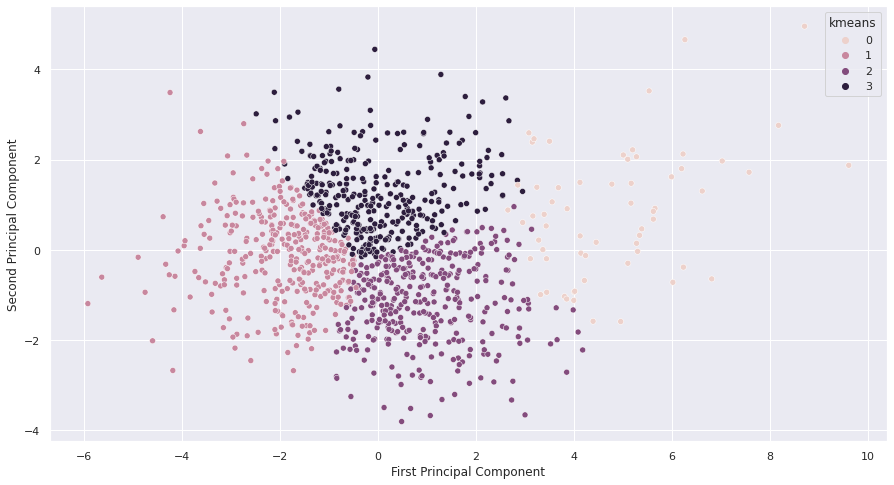

array([ True,  True,  True,  True,  True,  True,  True,  True])

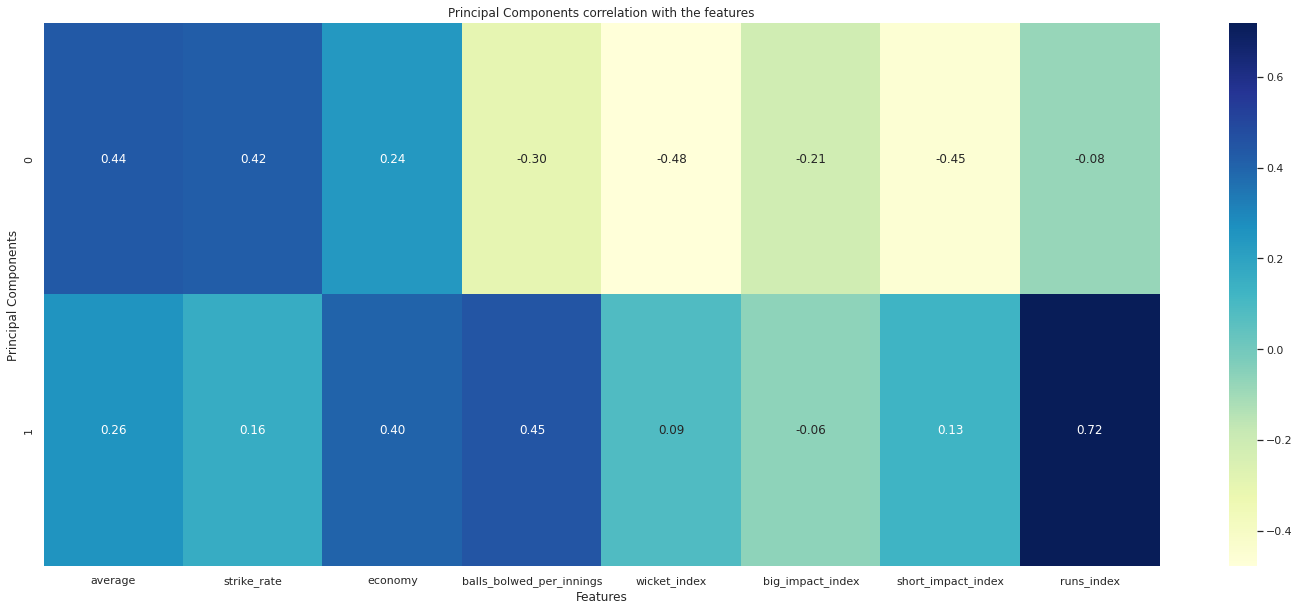

In [86]:
pca = PCA(n_components=2)

pca.fit(bowler_for_clustering_scaled)

x_pca = pca.transform(bowler_for_clustering_scaled)

print(bowler_for_clustering_scaled.shape)

print(x_pca.shape)

fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=results['kmeans'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

df = pd.DataFrame(pca.components_ , columns=columns)

fig = plt.figure(figsize=(25, 10))
sns.heatmap(df,cmap='YlGnBu',annot=True,fmt=".2f")
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.5)
selector.fit_transform(bowler_for_clustering_scaled)

selector.get_support()

In [87]:
pca.explained_variance_

array([3.91090297, 1.81475412])

In [88]:
pca.explained_variance_ratio_

array([0.48841231, 0.22663519])

In [89]:
dict_pca = dict(zip(columns,np.round(pca.components_[0],3)))
dict_pca

{'average': 0.437,
 'strike_rate': 0.422,
 'economy': 0.239,
 'balls_bolwed_per_innings': -0.297,
 'wicket_index': -0.479,
 'big_impact_index': -0.214,
 'short_impact_index': -0.452,
 'runs_index': -0.079}

In [90]:
final_index['pca_metric'] = 0
for i in columns:
  final_index['pca_metric'] = np.round(final_index['pca_metric'] + (final_index[i] * dict_pca.get(i)),3)

In [91]:
final_index[final_index.country.isin(top10countries)].sort_values('pca_metric',ascending = False).head(10).drop(['rfc_metric','xgb_metric','voting_metric','ovr_metric'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,pca_metric
1078,JT Smuts,SA,7.654,8.779,0.287,-1.284,-2.067,-0.429,-2.142,-0.843,0,9.617
1077,RG Sharma,INDIA,4.307,3.491,1.795,-2.916,-2.040,-0.429,-2.112,-1.820,0,6.818
1055,Iftikhar Ahmed,PAK,3.585,3.958,0.408,-2.099,-1.962,-0.429,-2.024,-1.525,0,6.025
1066,EMDY Munaweera,SL,3.225,2.869,1.247,-1.677,-1.823,-0.429,-1.868,-0.731,0,5.283
1070,JL Ontong,SA,2.761,1.003,4.542,-2.497,-1.702,-0.429,-1.731,-0.293,0,5.170
1068,Nazmul Hossain,BAN,1.937,1.469,1.511,-2.087,-1.702,-0.429,-1.731,-1.039,0,4.218
940,GSNFG Jayasuriya,SL,2.143,1.749,1.333,-1.603,-1.646,-0.429,-1.668,-0.552,0,4.147
872,Mehidy Hasan Miraz,BAN,2.736,2.402,1.219,-0.416,-1.560,-0.429,-1.573,0.571,0,4.130
1082,CL White,AUS,1.113,1.469,-0.119,-2.661,-1.823,-0.429,-1.868,-2.260,2,3.856
1045,CD Barnwell,WI,1.113,1.003,0.749,-2.497,-1.702,-0.429,-1.731,-1.784,2,3.660


In [92]:
final_index

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric,pca_metric
0,Shakib Al Hasan,BAN,-0.489,-0.412,-0.553,1.159,0.742,0.892,0.474,0.481,1,0.259,0.314,0.270,0.179,-1.662
1,TG Southee,NZ,-0.247,-0.405,0.529,1.101,0.694,0.033,0.756,1.491,3,0.611,0.631,0.626,0.680,-1.279
2,Rashid Khan,AFG,-0.844,-0.809,-0.944,1.258,2.044,1.626,1.713,0.172,1,0.407,0.361,0.338,0.462,-3.425
3,SL Malinga,SL,-0.443,-0.490,-0.019,0.960,0.830,0.326,0.764,0.836,1,0.386,0.393,0.380,0.274,-1.570
4,Shahid Afridi,PAK,-0.255,-0.078,-0.581,1.149,0.150,0.221,0.088,0.443,3,0.190,0.277,0.229,0.162,-0.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,1.886,2.325,0.016,-1.472,-1.702,-0.429,-1.731,-1.085,0,-0.270,-0.229,-0.221,0.542,4.021
1081,JJ Tucker,BMUDA,1.680,1.469,0.998,-2.087,-1.702,-0.429,-1.731,-1.272,0,-0.453,-0.446,-0.418,0.250,4.002
1082,CL White,AUS,1.113,1.469,-0.119,-2.661,-1.823,-0.429,-1.868,-2.260,2,-0.979,-1.038,-0.996,-1.485,3.856
1083,Zahid Khan,SLE,2.349,2.869,0.038,-0.857,-1.702,-0.429,-1.731,-0.666,0,0.058,0.154,0.142,0.861,4.244


In [93]:
final_index[['name','country','kmeans','rfc_metric','xgb_metric','voting_metric','ovr_metric','pca_metric']][final_index.country.isin(top10countries)].head(10)

,name,country,kmeans,rfc_metric,xgb_metric,voting_metric,ovr_metric,pca_metric
0,Shakib Al Hasan,BAN,1,0.259,0.314,0.270,0.179,-1.662
1,TG Southee,NZ,3,0.611,0.631,0.626,0.680,-1.279
2,Rashid Khan,AFG,1,0.407,0.361,0.338,0.462,-3.425
3,SL Malinga,SL,1,0.386,0.393,0.380,0.274,-1.570
4,Shahid Afridi,PAK,3,0.190,0.277,0.229,0.162,-0.818
5,Mustafizur Rahman,BAN,1,0.426,0.423,0.413,0.335,-1.859
6,Saeed Ajmal,PAK,1,0.261,0.294,0.255,0.211,-2.060
7,IS Sodhi,NZ,3,0.492,0.477,0.484,0.523,-1.487
8,AU Rashid,ENG,1,0.319,0.350,0.329,0.194,-1.192
9,CJ Jordan,ENG,3,0.541,0.576,0.573,0.673,-0.630


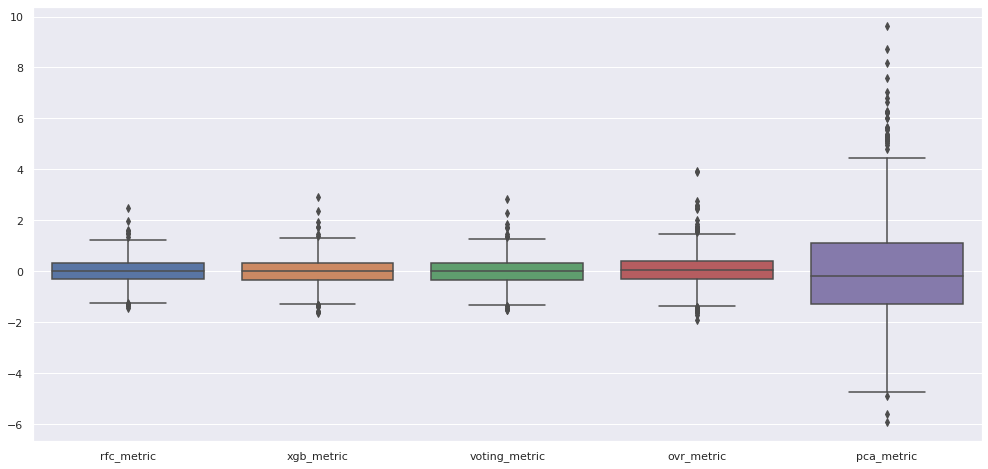

In [94]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=final_index[['rfc_metric','xgb_metric','voting_metric','ovr_metric','pca_metric']])
plt.show()